# Problem - 1

### 1.	A psychological study has been conducted by a team of students at a university on married couples to determine the cause of having an extra marital affair. They have surveyed and collected a sample of data on which they would like to do further analysis. Apply Logistic Regression on the data to correctly classify whether a given person will have an affair or not given the set of attributes. Convert the naffairs column to discrete binary type before proceeding with the algorithm.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import statsmodels.api as sm
import joblib, pickle

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc,classification_report

In [2]:
affairs = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day32-Logistic regression\Datasets-Day32-Logistic Regression\Affairs.csv")
affairs

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,597,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
597,598,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
598,599,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
599,600,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [3]:
#drop the  unwanted column
affairs.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [4]:
affairs.head()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [5]:
affairs.describe()

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,0.715474,0.026622,0.109817,0.154742,0.322795,0.386023,0.079867,0.272879,0.214642,0.316140,0.116473,0.086522,0.146423,0.174709,0.136439,0.116473,0.339434
std,3.298758,0.451564,0.161111,0.312922,0.361960,0.467935,0.487242,0.271313,0.445810,0.410916,0.465355,0.321058,0.281368,0.353824,0.380034,0.343540,0.321058,0.473912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
affairs.isnull().sum()

naffairs    0
kids        0
vryunhap    0
unhap       0
avgmarr     0
hapavg      0
vryhap      0
antirel     0
notrel      0
slghtrel    0
smerel      0
vryrel      0
yrsmarr1    0
yrsmarr2    0
yrsmarr3    0
yrsmarr4    0
yrsmarr5    0
yrsmarr6    0
dtype: int64

In [7]:
affairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   naffairs  601 non-null    int64
 1   kids      601 non-null    int64
 2   vryunhap  601 non-null    int64
 3   unhap     601 non-null    int64
 4   avgmarr   601 non-null    int64
 5   hapavg    601 non-null    int64
 6   vryhap    601 non-null    int64
 7   antirel   601 non-null    int64
 8   notrel    601 non-null    int64
 9   slghtrel  601 non-null    int64
 10  smerel    601 non-null    int64
 11  vryrel    601 non-null    int64
 12  yrsmarr1  601 non-null    int64
 13  yrsmarr2  601 non-null    int64
 14  yrsmarr3  601 non-null    int64
 15  yrsmarr4  601 non-null    int64
 16  yrsmarr5  601 non-null    int64
 17  yrsmarr6  601 non-null    int64
dtypes: int64(18)
memory usage: 84.6 KB


In [8]:
# convert to discrete binary
for i in range(0,601):
    if(affairs.naffairs[i] > 0):
        affairs.naffairs[i] = 1

affairs.naffairs.head()

0    0
1    0
2    1
3    0
4    1
Name: naffairs, dtype: int64

In [9]:
import statsmodels.formula.api as sm

In [10]:
#model building
logit_model = sm.logit('naffairs ~ kids + vryunhap + unhap + avgmarr + hapavg + vryhap + antirel + notrel + slghtrel + smerel + vryrel + yrsmarr1 + yrsmarr2 + yrsmarr3 + yrsmarr4 + yrsmarr5 + yrsmarr6', data=affairs).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.501009
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               naffairs   No. Observations:                  601
Model:                          Logit   Df Residuals:                      586
Method:                           MLE   Df Model:                           14
Date:                Sun, 08 Jan 2023   Pseudo R-squ.:                  0.1083
Time:                        15:33:55   Log-Likelihood:                -301.11
converged:                       True   LL-Null:                       -337.69
Covariance Type:            nonrobust   LLR p-value:                 5.129e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6174   7.36e+06  -8.39e-08      1.000   -1.44e+07    1.44e+07
kids           0.1727      0.311      0.556      0.579      -0.437       0.782
vryunhap       0.5130        nan        nan        nan         nan         nan
unhap          0.6187        nan        nan        nan         nan         nan
avgmarr       -0.2178        nan        nan        nan         nan         nan
hapavg        -0.5264        nan        nan        nan         nan         nan
vryhap        -1.0049        nan        nan        nan         nan         nan
antirel        0.7815        nan        nan        nan         nan         nan
notrel        -0.2052        nan        nan        nan         nan         nan
slghtrel       0.1848        nan        nan        nan         nan         nan
smerel        -0.7377        nan        nan        nan         nan         nan
vryrel        -0.6408        nan        nan        nan         nan         nan
yrsmarr1      -0.8579        nan        nan        nan         nan         nan
yrsmarr2      -0.5608        nan        nan        nan         nan         nan
yrsmarr3       0.0635        nan        nan        nan         nan         nan
yrsmarr4       0.0891        nan        nan        nan         nan         nan
yrsmarr5       0.4088        nan        nan        nan         nan         nan
yrsmarr6       0.2399        nan        nan        nan         nan         nan
==============================================================================
"""

In [11]:
#AIC means "Akaike's Information Criteria" and BIC means "Bayesian Information Criteria". It should be less
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.108     
Dependent Variable:    naffairs            AIC:                 632.2126  
Date:                  2023-01-08 15:33    BIC:                 698.1915  
No. Observations:      601                 Log-Likelihood:      -301.11   
Df Model:              14                  LL-Null:             -337.69   
Df Residuals:          586                 LLR p-value:         5.1293e-10
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        7.0000                                             
--------------------------------------------------------------------------
           Coef.    Std.Err.      z    P>|z|      [0.025         0.975]   
--------------------------------------------------------------------------
Intercept -0.6174 7359204.7349 -0.0000 1.0000 -14423776.8527 14423775.6179
kids       0.1727       0.3110  0.5555 0.5785        -0.4367        0.7822
vryunhap   0.5130          nan     nan    nan            nan           nan
unhap      0.6187          nan     nan    nan            nan           nan
avgmarr   -0.2178          nan     nan    nan            nan           nan
hapavg    -0.5264          nan     nan    nan            nan           nan
vryhap    -1.0049          nan     nan    nan            nan           nan
antirel    0.7815          nan     nan    nan            nan           nan
notrel    -0.2052          nan     nan    nan            nan           nan
slghtrel   0.1848          nan     nan    nan            nan           nan
smerel    -0.7377          nan     nan    nan            nan           nan
vryrel    -0.6408          nan     nan    nan            nan           nan
yrsmarr1  -0.8579          nan     nan    nan            nan           nan
yrsmarr2  -0.5608          nan     nan    nan            nan           nan
yrsmarr3   0.0635          nan     nan    nan            nan           nan
yrsmarr4   0.0891          nan     nan    nan            nan           nan
yrsmarr5   0.4088          nan     nan    nan            nan           nan
yrsmarr6   0.2399          nan     nan    nan            nan           nan
==========================================================================

"""

In [12]:
#predicting to logit model
pred = logit_model.predict(affairs.iloc[:, 1:])

In [13]:
#Roc curve to identify the appropriate cut off value

fpr,tpr,thresholds = roc_curve(affairs.naffairs, pred)
print(fpr,"\n")
print(tpr,"\n")
print(thresholds,'\n')

[0.         0.         0.         0.00443459 0.00443459 0.00665188
 0.00886918 0.00886918 0.01330377 0.01330377 0.01773836 0.02439024
 0.02439024 0.02882483 0.04656319 0.04878049 0.04878049 0.05099778
 0.05543237 0.05764967 0.06208426 0.07317073 0.07317073 0.07982262
 0.09090909 0.09312639 0.10864745 0.11086475 0.11529933 0.12195122
 0.12416851 0.12638581 0.13525499 0.13747228 0.14190687 0.14412417
 0.16851441 0.172949   0.1751663  0.1751663  0.17738359 0.17960089
 0.18625277 0.19512195 0.19955654 0.20177384 0.21064302 0.21507761
 0.2195122  0.22838137 0.23281596 0.23725055 0.26385809 0.26607539
 0.27272727 0.27494457 0.28159645 0.28381375 0.29490022 0.30155211
 0.31042129 0.31263858 0.34146341 0.345898   0.3481153  0.36807095
 0.37250554 0.37472284 0.38359202 0.38580931 0.38802661 0.39467849
 0.39689579 0.41685144 0.42572062 0.42793792 0.42793792 0.45232816
 0.45898004 0.46119734 0.4789357  0.48115299 0.51662971 0.51884701
 0.5232816  0.5232816  0.53436807 0.54988914 0.55432373 0.5676

In [14]:
optimal_idx = np.argmax(tpr - fpr)
optimal_idx

59

In [15]:
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.2521571570135329

In [16]:
import pylab as pl

i = np.arange(len(tpr))
i

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136])

In [17]:
roc = pd.DataFrame(({'fpr': pd.Series(fpr, index=i), "tpr": pd.Series(tpr, index=i), "1-fpr": pd.Series(1-fpr, index=i), 
                    'tf': pd.Series(tpr - (1-fpr), index=i), "thresholds": pd.Series(thresholds, index=i)}))

Text(0, 0.5, 'True positive rate')

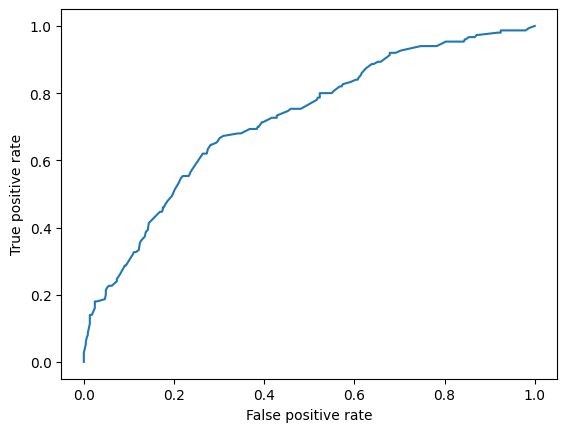

In [18]:
#ROC CURVE AND AUC
#PLOT OF ROC
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [19]:
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" %roc_auc)

Area under the ROC curve : 0.720872


In [20]:
#fill all the cells with zero

affairs['pred'] = np.zeros(601)       # add new column "pred" with all zeros

In [21]:
#taking threshold and above prob value will te treated as correct value


affairs.loc[pred > optimal_threshold, 'pred']=1 

                                                # if the value is greater than threshold value mark it as "1" otherwise "0"

In [22]:
#classification report
classification = classification_report(affairs['pred'], affairs['naffairs'])
print(classification)

              precision    recall  f1-score   support

         0.0       0.71      0.86      0.77       370
         1.0       0.65      0.42      0.51       231

    accuracy                           0.69       601
   macro avg       0.68      0.64      0.64       601
weighted avg       0.69      0.69      0.67       601



In [23]:
#splitting the data into train and split
train_data,test_data = train_test_split(affairs, test_size=0.3)

In [24]:
#model building
import statsmodels.formula.api as sm
model = sm.logit('naffairs ~ kids + vryunhap + unhap + avgmarr + hapavg + vryhap + antirel + notrel + slghtrel + smerel + vryrel + yrsmarr1 + yrsmarr2 + yrsmarr3 + yrsmarr4 + yrsmarr5 + yrsmarr6', data=train_data).fit()

Optimization terminated successfully.
         Current function value: 0.508366
         Iterations 10


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               naffairs   No. Observations:                  420
Model:                          Logit   Df Residuals:                      405
Method:                           MLE   Df Model:                           14
Date:                Sun, 08 Jan 2023   Pseudo R-squ.:                  0.1121
Time:                        15:33:55   Log-Likelihood:                -213.51
converged:                       True   LL-Null:                       -240.47
Covariance Type:            nonrobust   LLR p-value:                 1.325e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5275   1.07e+07  -4.93e-08      1.000    -2.1e+07     2.1e+07
kids           0.2139      0.349      0.613      0.540      -0.470       0.898
vryunhap       0.8284        nan        nan        nan         nan         nan
unhap          0.4377        nan        nan        nan         nan         nan
avgmarr       -0.1679        nan        nan        nan         nan         nan
hapavg        -0.6584        nan        nan        nan         nan         nan
vryhap        -0.9673        nan        nan        nan         nan         nan
antirel        1.0419   7.02e+06   1.48e-07      1.000   -1.38e+07    1.38e+07
notrel        -0.0965   4.23e+06  -2.28e-08      1.000   -8.29e+06    8.29e+06
slghtrel      -0.0360   7.18e+06  -5.01e-09      1.000   -1.41e+07    1.41e+07
smerel        -0.8348   7.29e+06  -1.15e-07      1.000   -1.43e+07    1.43e+07
vryrel        -0.6021   5.71e+06  -1.05e-07      1.000   -1.12e+07    1.12e+07
yrsmarr1      -0.8357        nan        nan        nan         nan         nan
yrsmarr2      -0.5137        nan        nan        nan         nan         nan
yrsmarr3       0.0596        nan        nan        nan         nan         nan
yrsmarr4       0.2552        nan        nan        nan         nan         nan
yrsmarr5       0.3586        nan        nan        nan         nan         nan
yrsmarr6       0.1485        nan        nan        nan         nan         nan
==============================================================================
"""

In [26]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                  Logit               Pseudo R-squared:    0.112     
Dependent Variable:     naffairs            AIC:                 457.0274  
Date:                   2023-01-08 15:33    BIC:                 517.6313  
No. Observations:       420                 Log-Likelihood:      -213.51   
Df Model:               14                  LL-Null:             -240.47   
Df Residuals:           405                 LLR p-value:         1.3249e-06
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         10.0000                                            
---------------------------------------------------------------------------
           Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------------
Intercept -0.5275 10693981.1580 -0.0000 1.0000 -20959818.4486 20959817.3936
kids       0.2139        0.3488  0.6133 0.5397        -0.4697        0.8975
vryunhap   0.8284           nan     nan    nan            nan           nan
unhap      0.4377           nan     nan    nan            nan           nan
avgmarr   -0.1679           nan     nan    nan            nan           nan
hapavg    -0.6584           nan     nan    nan            nan           nan
vryhap    -0.9673           nan     nan    nan            nan           nan
antirel    1.0419  7022862.9796  0.0000 1.0000 -13764557.4664 13764559.5502
notrel    -0.0965  4227303.1545 -0.0000 1.0000  -8285362.0310  8285361.8380
slghtrel  -0.0360  7180305.0856 -0.0000 1.0000 -14073139.4018 14073139.3299
smerel    -0.8348  7290316.5146 -0.0000 1.0000 -14288758.6393 14288756.9697
vryrel    -0.6021  5711526.0924 -0.0000 1.0000 -11194386.0400 11194384.8358
yrsmarr1  -0.8357           nan     nan    nan            nan           nan
yrsmarr2  -0.5137           nan     nan    nan            nan           nan
yrsmarr3   0.0596           nan     nan    nan            nan           nan
yrsmarr4   0.2552           nan     nan    nan            nan           nan
yrsmarr5   0.3586           nan     nan    nan            nan           nan
yrsmarr6   0.1485           nan     nan    nan            nan           nan
===========================================================================

"""

In [27]:
#prediction on test data
test_pred= model.predict(test_data)
test_pred

59     0.178810
345    0.284965
411    0.331825
30     0.190272
172    0.237235
         ...   
300    0.460353
539    0.150008
213    0.237235
566    0.307186
138    0.605509
Length: 181, dtype: float64

In [28]:
# Creating new column for storing predicted class of Attorney
# filling all the cells with zeroes
test_data["test_pred"] = np.zeros(181)

In [29]:
test_data

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,pred,test_pred
59,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0.0,0.0
345,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1.0,0.0
411,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.0,0.0
30,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0.0,0.0
172,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,0.0
539,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0
213,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0
566,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0


In [30]:
# taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1

test_data.loc[test_pred > optimal_threshold, "test_pred"] = 1

In [31]:
test_data

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,pred,test_pred
59,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0.0,0.0
345,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1.0,1.0
411,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.0,1.0
30,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0.0,0.0
172,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,1.0
539,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0
213,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0
566,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.0,1.0


In [32]:
confusion_matrix = pd.crosstab(test_data.test_pred, test_data['naffairs'])
confusion_matrix

naffairs,0,1
test_pred,,
0.0,87,17
1.0,53,24


In [33]:
accuracy_test = (101 + 26)/(181)
accuracy_test

0.7016574585635359

In [34]:
#classiication report
classification_test = classification_report(test_data['test_pred'],test_data['naffairs'])
print(classification_test)

              precision    recall  f1-score   support

         0.0       0.62      0.84      0.71       104
         1.0       0.59      0.31      0.41        77

    accuracy                           0.61       181
   macro avg       0.60      0.57      0.56       181
weighted avg       0.61      0.61      0.58       181



In [35]:
#Roc and auc curve
fpr, tpr, threshold = metrics.roc_curve(test_data['naffairs'],test_pred)

Text(0, 0.5, 'True positive rate')

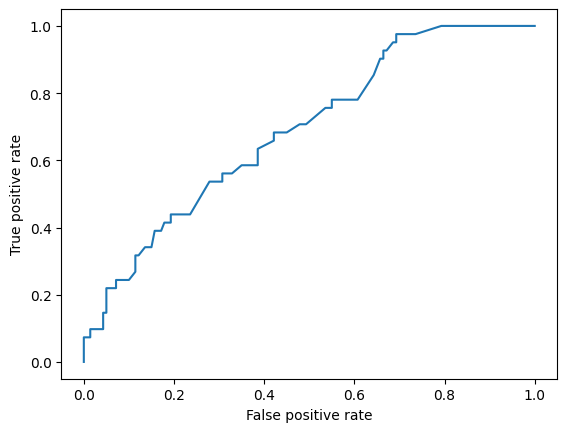

In [36]:
#plot of roc
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [37]:
roc_auc_test = metrics.auc(fpr, tpr)
roc_auc_test

0.6890243902439025

In [38]:
#prediction on train data
train_predict = model.predict(train_data.iloc[:, 1: ])
train_predict

24     0.108614
589    0.320208
202    0.532326
224    0.193784
108    0.237235
         ...   
445    0.418361
261    0.159984
200    0.284965
458    0.114611
1      0.123345
Length: 420, dtype: float64

In [39]:
#creating a new column
#filling all the cells with zero
train_data['train_pred'] =np.zeros(420)

In [40]:
train_data

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,pred,train_pred
24,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.0,0.0
589,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1.0,0.0
202,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1.0,0.0
224,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0
108,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,0.0
261,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0
200,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1.0,0.0
458,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0.0,0.0


In [41]:
#taking threshold value and above prob value will be treated as correct value
train_data.loc[train_predict > optimal_threshold, 'train_pred'] =1

In [42]:
train_data

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6,pred,train_pred
24,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.0,0.0
589,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1.0,1.0
202,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1.0,1.0
224,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0
108,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1.0,1.0
261,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0
200,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1.0,1.0
458,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0.0,0.0


In [43]:
#confusion matrix
confusion_matrix = pd.crosstab(train_data.train_pred, train_data['naffairs'])
confusion_matrix

naffairs,0,1
train_pred,,
0.0,209,33
1.0,102,76


In [44]:
accuracy_train =(219+59)/420
print(accuracy_train)

0.6619047619047619


# problem - 2

### 2.	In this time and age of widespread internet usage, effective and targeted marketing plays a vital role. A marketing company would like to develop a strategy by analyzing their customer data. For this, data like age, location, time of activity, etc. has been collected to determine whether a user will click on an ad or not. Perform Logistic Regression on the given data to predict whether a user will click on an ad or not. 

In [349]:
#importing required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import statsmodels.formula.api as sm
import joblib, pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

In [350]:
adv = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day32-Logistic regression\Datasets-Day32-Logistic Regression\advertising.csv")
adv

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/06/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11/02/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22/04/2016 2:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1/02/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24/03/2016 2:35,0


In [351]:
#renaming the column names else it will throw error
adv.rename(columns={'Daily_Time_ Spent _on_Site':'Daily_Time_Spent_on_Site','Daily Internet Usage':'Daily_Internet_Usage'},inplace=True)

In [352]:
adv.drop(columns=['Timestamp','Ad_Topic_Line'],axis=1,inplace=True)

In [353]:
#column names
adv.columns

Index(['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage', 'City', 'Male', 'Country', 'Clicked_on_Ad'],
      dtype='object')

In [354]:
#shape of the data
adv.shape

(1000, 8)

In [355]:
#information about the data
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily_Time_Spent_on_Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area_Income               1000 non-null   float64
 3   Daily_Internet_Usage      1000 non-null   float64
 4   City                      1000 non-null   object 
 5   Male                      1000 non-null   int64  
 6   Country                   1000 non-null   object 
 7   Clicked_on_Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [356]:
#checking for null values
adv.isnull().any()

Daily_Time_Spent_on_Site    False
Age                         False
Area_Income                 False
Daily_Internet_Usage        False
City                        False
Male                        False
Country                     False
Clicked_on_Ad               False
dtype: bool

In [357]:
#checking for duplicates
adv.duplicated().sum()

0

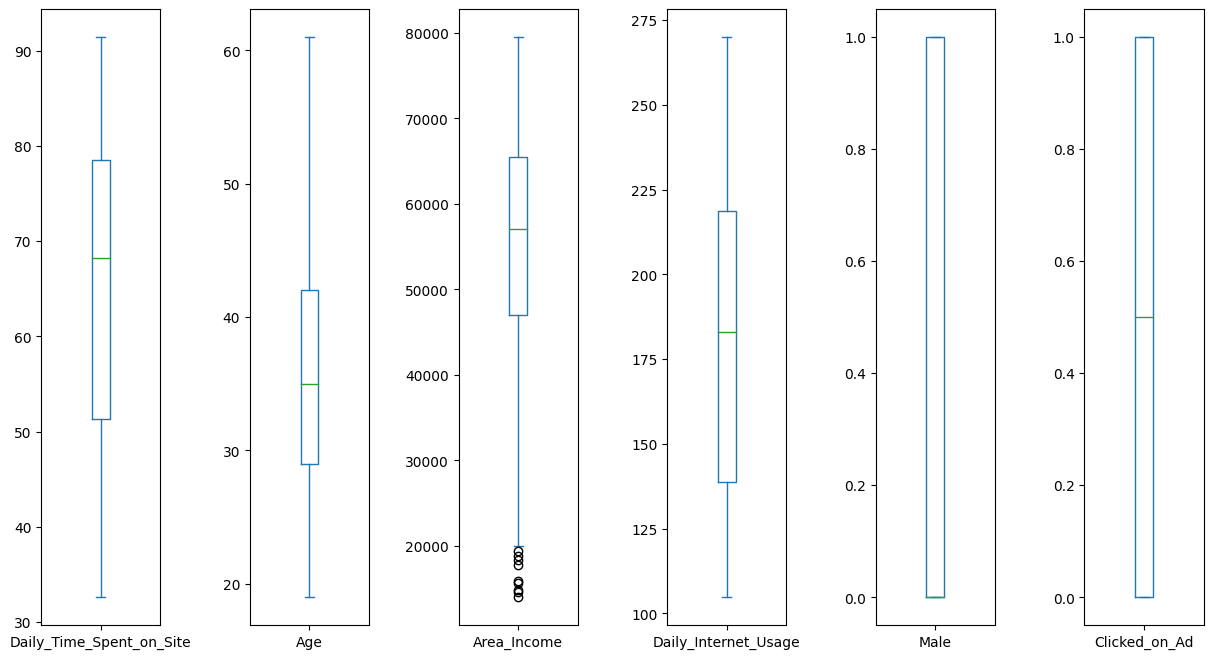

In [358]:
#checking for outliers
adv.plot(kind='box',subplots=True,sharey= False, figsize=(15,8))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [359]:
winsor=Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['Area_Income'])
adv['Area_Income']=winsor.fit_transform(adv[['Area_Income']])

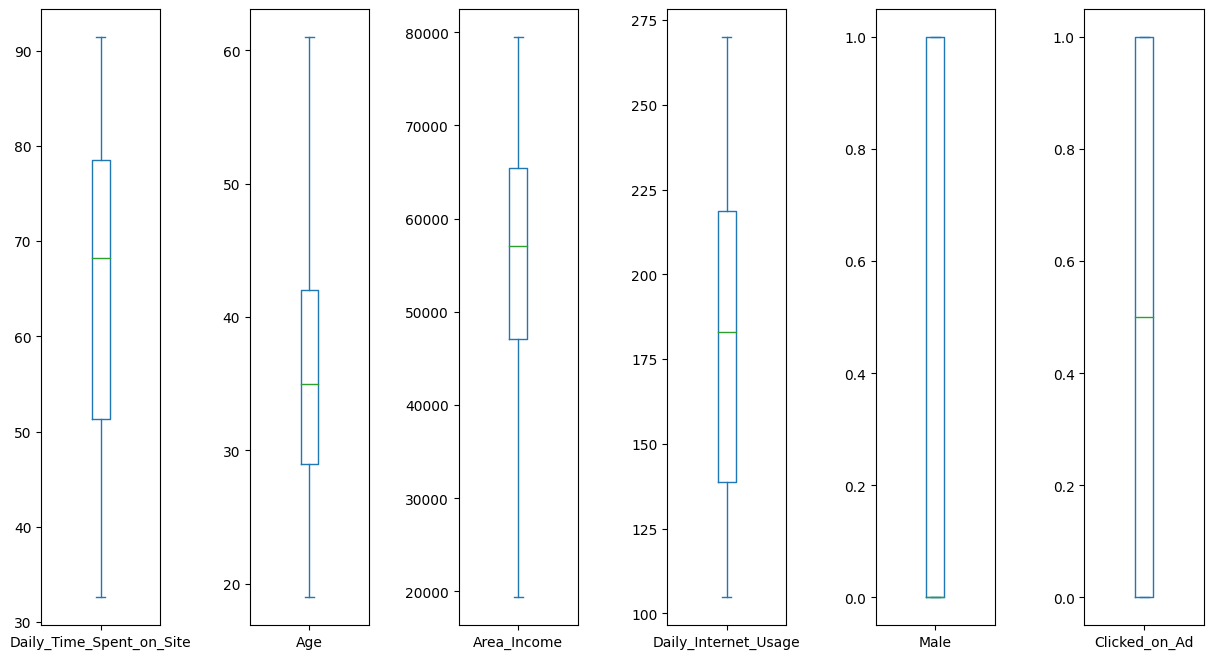

In [360]:
#checking for outliers after outlier treatment
adv.plot(kind='box',subplots=True,sharey= False, figsize=(15,8))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [361]:
#selecting input and output variables
X = pd.DataFrame(adv.iloc[:,:-1])
Y = pd.DataFrame(adv.iloc[:,-1])

In [362]:
X.head(2)

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,City,Male,Country
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru


In [363]:
X['City'].unique()

array(['Wrightburgh', 'West Jodi', 'Davidton', 'West Terrifurt',
       'South Manuel', 'Jamieberg', 'Brandonstad', 'Port Jefferybury',
       'West Colin', 'Ramirezton', 'West Brandonton', 'East Theresashire',
       'West Katiefurt', 'North Tara', 'West William', 'New Travistown',
       'West Dylanberg', 'Pruittmouth', 'Jessicastad', 'Millertown',
       'Port Jacqueline', 'Lake Nicole', 'South John', 'Pamelamouth',
       'Harperborough', 'Port Danielleberg', 'West Jeremyside',
       'South Cathyfurt', 'Palmerside', 'West Guybury', 'Phelpschester',
       'Lake Melindamouth', 'North Richardburgh', 'Port Cassie',
       'New Thomas', 'Johnstad', 'West Aprilport', 'Kellytown',
       'Charlesport', 'Millerchester', 'Mackenziemouth', 'Zacharystad',
       'North Joshua', 'Bowenview', 'Jamesberg', 'Lake Cassandraport',
       'New Sharon', 'Johnport', 'Hamiltonfort', 'West Christopher',
       'Hollandberg', 'Odomville', 'East Samanthashire', 'South Lauraton',
       'Amandahaven', 'T

In [364]:
X['City'].value_counts()

Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 969, dtype: int64

In [365]:
X['Country'].unique()

array(['Tunisia', 'Nauru', 'San Marino', 'Italy', 'Iceland', 'Norway',
       'Myanmar', 'Australia', 'Grenada', 'Ghana', 'Qatar', 'Burundi',
       'Egypt', 'Bosnia and Herzegovina', 'Barbados', 'Spain',
       'Palestinian Territory', 'Afghanistan',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Russian Federation', 'Cameroon', 'Korea', 'Tokelau', 'Monaco',
       'Tuvalu', 'Greece', 'British Virgin Islands',
       'Bouvet Island (Bouvetoya)', 'Peru', 'Aruba', 'Maldives',
       'Senegal', 'Dominica', 'Luxembourg', 'Montenegro', 'Ukraine',
       'Saint Helena', 'Liberia', 'Turkmenistan', 'Niger', 'Sri Lanka',
       'Trinidad and Tobago', 'United Kingdom', 'Guinea-Bissau',
       'Micronesia', 'Turkey', 'Croatia', 'Israel',
       'Svalbard & Jan Mayen Islands', 'Azerbaijan', 'Iran',
       'Saint Vincent and the Grenadines', 'Bulgaria', 'Christmas Island',
       'Canada', 'Rwanda', 'Turks and Caicos Islands', 'Norfolk Island',
       'Cook Islands', 'Guatem

In [366]:
X['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

In [367]:
Y.head(2)

,Clicked_on_Ad
0,0
1,0


In [368]:
#seperating caterical and numerical variables
cate_feat = X.select_dtypes(include=['object']).columns
print(cate_feat)
print('\n')
num_feat = X.select_dtypes(exclude=['object']).columns
print(num_feat)

Index(['City', 'Country'], dtype='object')


Index(['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage', 'Male'],
      dtype='object')


In [369]:
#scaling using minmax scaler
scale_pipeline = Pipeline(steps=[('scale',MinMaxScaler())])
scale_col_preprocessed = ColumnTransformer(transformers=[('scale', scale_pipeline, num_feat)])

In [370]:
scaled = scale_col_preprocessed.fit(X)

In [371]:
joblib.dump(scaled, 'minmax')

['minmax']

In [372]:
scaled_data = pd.DataFrame(scaled.transform(X),columns=num_feat)
scaled_data

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male
0,0.617882,0.380952,0.706363,0.916031,0.0
1,0.809621,0.285714,0.816291,0.538746,1.0
2,0.626721,0.166667,0.672293,0.797433,0.0
3,0.706272,0.238095,0.589451,0.854280,1.0
4,0.608023,0.380952,0.906926,0.731323,0.0
...,...,...,...,...,...
995,0.686215,0.261905,0.865246,0.628405,1.0
996,0.317865,0.619048,0.805317,0.179441,1.0
997,0.323474,0.761905,0.383325,0.094382,1.0
998,0.390107,0.000000,0.375092,0.503511,0.0


In [375]:
#encoding using onehot encoder

encode=pd.get_dummies(X,columns=['Country','City'])
encode

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antarctica (the territory South of 60 deg S),Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Bouvet Island (Bouvetoya),Country_Brazil,Country_British Indian Ocean Territory (Chagos Archipelago),Country_British Virgin Islands,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cape Verde,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Christmas Island,Country_Colombia,Country_Comoros,Country_Congo,Country_Cook Islands,Country_Costa Rica,Country_Cote d'Ivoire,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,...,City_West Lacey,City_West Leahton,City_West Lindseybury,City_West Lisa,City_West Lucas,City_West Mariafort,City_West Melaniefurt,City_West Melissashire,City_West Michaelhaven,City_West Michaelport,City_West Michaelshire,City_West Michaelstad,City_West Pamela,City_West Randy,City_West Raymondmouth,City_West Rhondamouth,City_West Ricardo,City_West Richard,City_West Robertside,City_West Roytown,City_West Russell,City_West Ryan,City_West Samantha,City_West Shannon,City_West Sharon,City_West Shaun,City_West Steven,City_West Sydney,City_West Tanner,City_West Tanya,City_West Terrifurt,City_West Thomas,City_West Tinashire,City_West Travismouth,City_West Wendyland,City_West William,City_West Zacharyborough,City_Westshire,City_Whiteport,City_Whitneyfort,City_Wilcoxport,City_Williammouth,City_Williamport,City_Williamsborough,City_Williamsfort,City_Williamsmouth,City_Williamsport,City_Williamsside,City_Williamstad,City_Wilsonburgh,City_Wintersfort,City_Wongland,City_Wrightburgh,City_Wrightview,City_Yangside,City_Youngburgh,City_Youngfort,City_Yuton,City_Zacharystad,City_Zacharyton
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [376]:
#concatente data will have a new sequence
new_adv = pd.concat([scaled_data,encode],axis=1)
new_adv

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antarctica (the territory South of 60 deg S),Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Bouvet Island (Bouvetoya),Country_Brazil,Country_British Indian Ocean Territory (Chagos Archipelago),Country_British Virgin Islands,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cape Verde,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Christmas Island,Country_Colombia,Country_Comoros,Country_Congo,Country_Cook Islands,Country_Costa Rica,...,City_West Lacey,City_West Leahton,City_West Lindseybury,City_West Lisa,City_West Lucas,City_West Mariafort,City_West Melaniefurt,City_West Melissashire,City_West Michaelhaven,City_West Michaelport,City_West Michaelshire,City_West Michaelstad,City_West Pamela,City_West Randy,City_West Raymondmouth,City_West Rhondamouth,City_West Ricardo,City_West Richard,City_West Robertside,City_West Roytown,City_West Russell,City_West Ryan,City_West Samantha,City_West Shannon,City_West Sharon,City_West Shaun,City_West Steven,City_West Sydney,City_West Tanner,City_West Tanya,City_West Terrifurt,City_West Thomas,City_West Tinashire,City_West Travismouth,City_West Wendyland,City_West William,City_West Zacharyborough,City_Westshire,City_Whiteport,City_Whitneyfort,City_Wilcoxport,City_Williammouth,City_Williamport,City_Williamsborough,City_Williamsfort,City_Williamsmouth,City_Williamsport,City_Williamsside,City_Williamstad,City_Wilsonburgh,City_Wintersfort,City_Wongland,City_Wrightburgh,City_Wrightview,City_Yangside,City_Youngburgh,City_Youngfort,City_Yuton,City_Zacharystad,City_Zacharyton
0,0.617882,0.380952,0.706363,0.916031,0.0,68.95,35,61833.90,256.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.809621,0.285714,0.816291,0.538746,1.0,80.23,31,68441.85,193.77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.626721,0.166667,0.672293,0.797433,0.0,69.47,26,59785.94,236.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.706272,0.238095,0.589451,0.854280,1.0,74.15,29,54806.18,245.89,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.608023,0.380952,0.906926,0.731323,0.0,68.37,35,73889.99,225.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [377]:
#model building
X_train,X_test,Y_train,Y_test = train_test_split(new_adv,Y,test_size=0.3, random_state=0)
print('train: ',len(X_train), 'test: ',len(X_test))


train:  700 test:  300


In [378]:
#training the classification model
model = LogisticRegression()
model = model.fit(X_train,Y_train)

C:\Users\J. Berger Perkins\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [379]:
#check the accuracy on the training set
model.score(X_train,Y_train)

0.9457142857142857

In [380]:
#evaluating the model
print(model.predict(X_test))

[0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0
 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0
 0 0 1 1]


In [382]:
#generate evaluation matrix'
from sklearn import metrics
print('accuracy on test set:' , metrics.accuracy_score(Y_test,model.predict(X_test)))

accuracy on test set: 0.9433333333333334


In [385]:
# confusion matrix
metrics.confusion_matrix(Y_test,model.predict(X_test))

array([[160,   4],
       [ 13, 123]], dtype=int64)

In [387]:
#ROC CURVE
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])

In [389]:
#Receiver operating characteristic
# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 

ROC AUC: 0.97


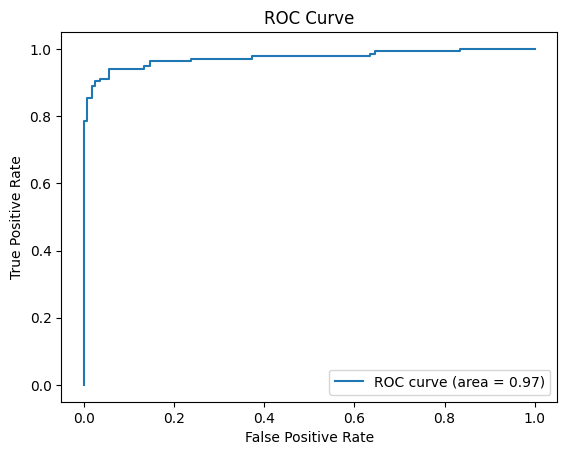

In [393]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [391]:
print(fpr)

[0.         0.         0.         0.00609756 0.00609756 0.01829268
 0.01829268 0.02439024 0.02439024 0.03658537 0.03658537 0.05487805
 0.05487805 0.13414634 0.13414634 0.14634146 0.14634146 0.23780488
 0.23780488 0.37195122 0.37195122 0.63414634 0.63414634 0.64634146
 0.64634146 0.83536585 0.83536585 1.        ]


In [392]:
print(tpr)

[0.         0.00735294 0.78676471 0.78676471 0.85294118 0.85294118
 0.88970588 0.88970588 0.90441176 0.90441176 0.91176471 0.91176471
 0.94117647 0.94117647 0.94852941 0.94852941 0.96323529 0.96323529
 0.97058824 0.97058824 0.97794118 0.97794118 0.98529412 0.98529412
 0.99264706 0.99264706 1.         1.        ]


In [396]:
print ('ROC AUC: %0.2f' % roc_auc)

ROC AUC: 0.97


# Poblem - 3

### 3.	Perform Logistic Regression on the dataset to predict whether a candidate will win or lose the election based on factors like amount of money spent and popularity rank. 

In [552]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import joblib, pickle

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc,accuracy_score,confusion_matrix,classification_report

In [553]:
#reading the data into python
election = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day32-Logistic regression\Datasets-Day32-Logistic Regression\election_data.csv")
election

,Election-id,Result,Year,Amount Spent,Popularity Rank
0,NaN,NaN,NaN,NaN,NaN
1,122.0,0.0,32.0,3.81,3.0
2,315.0,1.0,48.0,6.32,2.0
3,201.0,1.0,51.0,3.67,1.0
4,965.0,0.0,40.0,2.93,4.0
5,410.0,1.0,52.0,3.60,1.0
6,150.0,0.0,35.0,4.20,4.0
7,743.0,1.0,39.0,5.66,2.0
8,612.0,1.0,42.0,4.32,3.0
9,206.0,1.0,44.0,3.26,3.0


In [554]:
#information of the data
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Election-id      10 non-null     float64
 1   Result           10 non-null     float64
 2   Year             10 non-null     float64
 3   Amount Spent     10 non-null     float64
 4   Popularity Rank  10 non-null     float64
dtypes: float64(5)
memory usage: 568.0 bytes


In [555]:
#renaming so that no sapces is there otherwise error
election.columns= "Election_id","Result","Year","Amount_Spent","Popularity_Rank"

In [556]:
#rearranging the columns
election = election[['Result', 'Election_id', 'Year', 'Amount_Spent', 'Popularity_Rank']]

In [557]:
#checking for null values
election.isnull().sum()

Result             1
Election_id        1
Year               1
Amount_Spent       1
Popularity_Rank    1
dtype: int64

In [558]:
#drop the null values
election= election.dropna()

In [559]:
election.isnull().sum()

Result             0
Election_id        0
Year               0
Amount_Spent       0
Popularity_Rank    0
dtype: int64

In [560]:
#eda or statistical analysis
election.describe()

,Result,Election_id,Year,Amount_Spent,Popularity_Rank
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,451.600000,43.300000,4.229000,2.700000
std,0.516398,304.266404,6.912951,1.055351,1.159502
min,0.000000,122.000000,32.000000,2.930000,1.000000
25%,0.000000,202.250000,39.250000,3.617500,2.000000
50%,1.000000,362.500000,43.000000,4.005000,3.000000
75%,1.000000,710.250000,49.500000,4.470000,3.750000
max,1.000000,965.000000,52.000000,6.320000,4.000000


In [561]:
#seperating input and output variables
X = election.iloc[:, 1:]
y = election[["Result"]]

In [562]:
X.head(2)

,Election_id,Year,Amount_Spent,Popularity_Rank
1,122.0,32.0,3.81,3.0
2,315.0,48.0,6.32,2.0


In [563]:
y.head(2)

,Result
1,0.0
2,1.0


In [564]:
log_model = LogisticRegression()
log_model.fit(X,y)

LogisticRegression()

In [565]:
y_pred = log_model.predict(X)
y_pred

array([0., 1., 1., 0., 1., 0., 1., 1., 1., 1.])

In [566]:
#Testing model accuracy
#confusion matrix
confusion_matrix(y,y_pred)

array([[3, 1],
       [0, 6]], dtype=int64)

In [567]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
accuracy_score = (3+6)/(10)
accuracy_score

0.9

In [568]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [569]:
log_model.predict_proba(X)[:,1]

array([0.28482994, 0.96915209, 0.98966345, 0.0854451 , 0.98738722,
       0.18395657, 0.72027652, 0.53660311, 0.70751636, 0.53517072])

In [570]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix,roc_auc_score


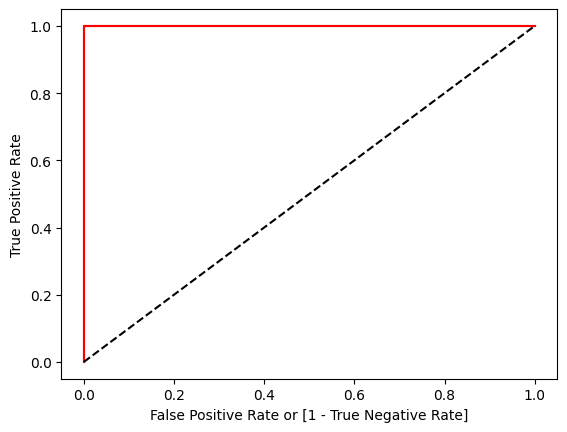

In [571]:
fpr,tpr,thresholds = roc_curve(y,log_model.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc = roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [572]:
print('auc accuracy:',auc)

auc accuracy: 0.875


In [573]:
# Splitting the data into train and test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
lr = LogisticRegression(random_state=0)
model1 = lr.fit(X_train,y_train)

In [574]:
#testing the model
y_pred_test = lr.predict(X_test)

In [575]:
print(confusion_matrix(y_test,y_pred_test))

[[0 0]
 [1 2]]


In [576]:
print(accuracy_score(y_test,y_pred_test))

0.6666666666666666


In [577]:
#training the  model
y_pred_train = lr.predict(X_train)

In [578]:
print(confusion_matrix(y_train,y_pred_train))

[[4 0]
 [1 2]]


In [579]:
print(accuracy_score(y_train,y_pred_train))

0.8571428571428571


train and test accuracy is not that much close so it is average model.

# Problem - 4

### 4.	It is vital for banks that customers put in long term fixed deposits as they use it to pay interest to customers and it is not viable to ask every customer if they will put in a long-term deposit or not. So, build a Logistic Regression model to predict whether a customer will put in a long-term fixed deposit or not based on the different variables given in the data. The output variable in the dataset is Y which is binary. Snapshot of the dataset is given below.

In [580]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,auc,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [581]:
import warnings
warnings.filterwarnings('ignore')

In [582]:
bank = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day32-Logistic regression\Datasets-Day32-Logistic Regression\bank_data.csv")
bank

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [583]:
#renaming columns
bank.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin.', 'joblue.collar',
       'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired',
       'joself.employed', 'joservices', 'jostudent', 'jotechnician',
       'jounemployed', 'jounknown', 'y'],
      dtype='object')

In [584]:
bank.columns=['age','default','balance','housing','loan','duration','campaign','pdays','previous','poutfailure','poutother',
              'poutsuccess','poutunknown','con_cellular', 'con_telephone', 'con_unknown','divorced','married','single',
              'joadmin','joblue_collar','joentrepreneur','johousemaid','jomanagement','joretired','joself_employed',
              'joservices','jostudent','jotechnician','jounemployed','jounknown','y']

In [585]:
bank.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutfailure', 'poutother', 'poutsuccess',
       'poutunknown', 'con_cellular', 'con_telephone', 'con_unknown',
       'divorced', 'married', 'single', 'joadmin', 'joblue_collar',
       'joentrepreneur', 'johousemaid', 'jomanagement', 'joretired',
       'joself_employed', 'joservices', 'jostudent', 'jotechnician',
       'jounemployed', 'jounknown', 'y'],
      dtype='object')

In [586]:
#model building
#seperating input and output variables
X = bank.iloc[:, :-1]
y = bank[["y"]]

In [587]:
X.head(2)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin,joblue_collar,joentrepreneur,johousemaid,jomanagement,joretired,joself_employed,joservices,jostudent,jotechnician,jounemployed,jounknown
0,58,0,2143,1,0,261,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [588]:
y.head(2)

,y
0,0
1,0


In [589]:
#model building
log_model = LogisticRegression()
log_model.fit(X,y)

LogisticRegression()

In [590]:
#pedict the model
Y_pred = log_model.predict(X)
Y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [591]:
#testing model accuracy
confusion_matrix(y,Y_pred)

array([[39164,   758],
       [ 4112,  1177]], dtype=int64)

In [592]:
accuracy =(39164+1177)/(45211)
accuracy


0.8922828515184358

In [593]:
print(classification_report(y,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.61      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.76      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [596]:
log_model.predict_proba(X)[:,1]

array([0.03512027, 0.0248116 , 0.01873678, ..., 0.79615623, 0.1129886 ,
       0.07200636])

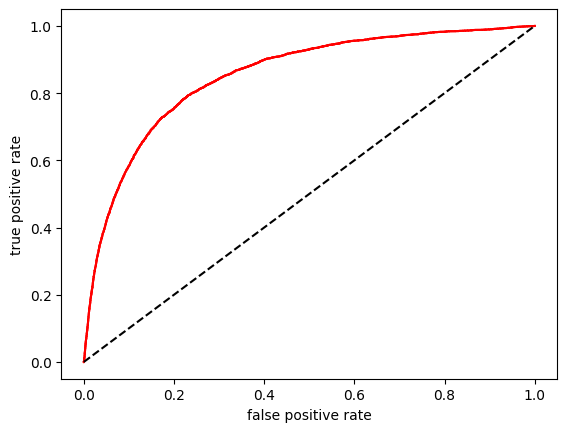

In [597]:
#plotting roc curve
fpr,tpr,thresholds = roc_curve(y,log_model.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc = roc_auc_score(y,Y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [598]:
print('auc acuracy:' ,auc)

auc acuracy: 0.6017751584771625


In [599]:
#spilitting the data into rain test split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [600]:
classifier = LogisticRegression()
model1 = classifier.fit(X_train,Y_train)

In [603]:
#testing the model
Y_pred_test = classifier.predict(X_test)
print(confusion_matrix(Y_test,Y_pred_test))

[[11780   189]
 [ 1325   270]]


In [604]:
print(accuracy_score(Y_test,Y_pred_test))

0.8883810085520495


In [605]:
#training the model
Y_pred_train = classifier.predict(X_train)
print(confusion_matrix(Y_train,Y_pred_train))

[[27554   399]
 [ 3004   690]]


In [606]:
print(accuracy_score(Y_train,Y_pred_train))

0.892470060353272


 train and test accuracy is close enough so it is good model.